# Linear and Logistic Regression 

This Jupyter Notebook accompanies the blog posts on Linear and Logistic Regression

First of all we will begin by importing the libraries we will need. 
__Numpy__ is a linear algebra library in Python and we will be using it to do all of the matrix and vector computations in our code.
__Pandas__ is used to import our data and clean it up before we pass it to our machine learning algorithms.
__Matplotlib__ will allow us to visualise the training process

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Next, to import the data - the dataset is ____.
**TODO: use a dataset to train algorithm on, currently just random values**

In [ ]:
df = pd.read_csv("")

Next to clean up into the format we want:
    X = _n x m_ matrix, Y = _1 x m _ matrix

In [39]:
#Replace this with actual values

X_lin_train = np.random.randn(20,100)
Y_lin_train = np.random.randn(1,100)

X_lin_test = np.random.randn(20,100)
Y_lin_test = np.random.randn(1,100)

X_log_train = np.random.randn(20,100)
Y_log_train = np.round(np.random.random_sample((1,100)))

X_log_test = np.random.randn(20,100)
Y_log_test = np.round(np.random.random_sample((1,100)))

Next we initialise the weights and biases

In [145]:
W_lin = np.random.randn(Y_lin.shape[0], X_lin.shape[0])
b_lin = np.random.randn(Y_lin.shape[0],1)

W_log = np.random.randn(Y_log.shape[0], X_log.shape[0])
b_log = np.random.randn(Y_log.shape[0],1)


Now we code up the equations for the forward step:
    $$ \hat{Y}_{lin} = WX+b$$
    $$ \hat{Y}_{log} = \sigma(WX+b)$$

In [41]:
def forward_lin(X, W, b):
    return np.dot(W,X)+b

def sigmoid(Z):
    return 1.0/(1+np.exp(-Z))

def forward_log(X,W,b):
    return sigmoid(forward_lin(X,W,b))

Let's look at some sample predictions from the network.

In [42]:
pd.DataFrame({"predictions":forward_lin(X_lin_train[:,:3],W_lin,b_lin)[0] , "Y": Y_lin_train[:,:3][0] }).head()

,Y,predictions
0,2.967336,0.005443
1,-0.371665,-1.796815
2,0.880066,0.398904


In [43]:
pd.DataFrame({"predictions":forward_log(X_log_train[:,:3],W_log,b_log)[0] , "Y": Y_log_train[:,:3][0] }).head()

,Y,predictions
0,1.0,0.009350
1,1.0,0.999698
2,1.0,0.058337


Not very good! So let's train the model:

First - the loss functions need to be defined: these are

$$ J(W,b) = \frac{1}{2m} \sum_{i=1}^{n} (y^{(i)} - y^{(i)}_{pred})^2 $$


$$ J(W,b) = \frac{-1}{m} \sum_{i=1}^{n} y^{(i)} \log(y^{(i)}_{pred}) + (1-y^{(i)}) \log(1-y^{(i)}_{pred})$$



In [110]:
def MSE_loss(Y, Y_pred):
    return (1.0/(2*Y.shape[1]))*np.sum(np.square(Y-Y_pred))
                                      

def log_loss(Y, Y_pred):
    return (-1.0/(Y.shape[1]))*np.sum(Y*np.log(Y_pred) + (1-Y)*np.log(1-Y_pred))
    

In [54]:
MSE_loss(Y_lin,forward_lin(X_lin_train,W_lin,b_lin))

10.385266110432534

Now, to compute the gradients, note that they are actually the same for both linear and logistic regression:
$$\frac{\partial{J}}{\partial{W}} =  \frac{1}{m} \sum_{i=1}^{n} x^{(i)}(y^{(i)}_{pred} - y^{(i)})$$
$$\frac{\partial{J}}{\partial{b}} =  \frac{1}{m} \sum_{i=1}^{n}(y^{(i)}_{pred} - y^{(i)}) $$




In [96]:
def grads(X, Y, Y_pred):
    dW = (1.0/(Y.shape[1]))*np.sum(X*(Y_pred-Y),axis=1, keepdims=True).T
    db = (1.0/(Y.shape[1]))*np.sum((Y_pred-Y),axis=1,keepdims=True)
    return dW, db

In [144]:
def gradient_descent_lin(X, W, b, Y, alpha=1e-2, iterations=500):
    MSE_losses = []
    for i in range(iterations):
        Y_pred = forward_lin(X, W, b)
        MSE_losses.append(MSE_loss(Y,Y_pred))
        if(i%50==0):
            print("Iteration {}: Loss={}".format(i, MSE_losses[i]))
        dW, db = grads(X, Y, Y_pred)
        W = W -  alpha*dW
        b = b - alpha*db
    plt.plot(range(iterations),MSE_losses)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()
    return W, b


def gradient_descent_log(X, W, b, Y, alpha=1e-1, iterations=1000):
    log_losses = []
    for i in range(iterations):
        Y_pred = forward_log(X, W, b)
        log_losses.append(log_loss(Y, Y_pred))
        if(i%50==0):
            print("Iteration {}: Loss={}".format(i, log_losses[i]))
        dW, db = grads(X, Y, Y_pred)
        W = W -  alpha*dW
        b = b - alpha*db
    plt.plot(range(iterations),log_losses)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()
    return W, b

Iteration 0: Loss=18.46271234281027
Iteration 50: Loss=6.103043434677841
Iteration 100: Loss=2.491678642872551
Iteration 150: Loss=1.2712368032581125
Iteration 200: Loss=0.8058661781929464
Iteration 250: Loss=0.607908095328664
Iteration 300: Loss=0.5150756110477304
Iteration 350: Loss=0.4678987742240368
Iteration 400: Loss=0.44241227609565303
Iteration 450: Loss=0.4280192104684566


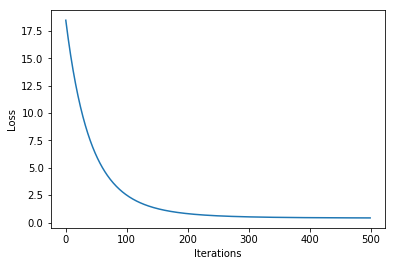

In [146]:
W_lin, b_lin = gradient_descent_lin(X_lin_train, W_lin, b_lin, Y_lin_train )

Iteration 0: Loss=2.6177304320916295
Iteration 50: Loss=1.3309357485454403
Iteration 100: Loss=0.7706035549913226
Iteration 150: Loss=0.631923469771251
Iteration 200: Loss=0.5953892450239959
Iteration 250: Loss=0.5828740403910088
Iteration 300: Loss=0.5774069029312631
Iteration 350: Loss=0.5746036140059299
Iteration 400: Loss=0.5730470600678195
Iteration 450: Loss=0.5721495341688473
Iteration 500: Loss=0.5716217468107698
Iteration 550: Loss=0.5713076714787081
Iteration 600: Loss=0.5711192045745727
Iteration 650: Loss=0.5710053663353452
Iteration 700: Loss=0.5709362229415463
Iteration 750: Loss=0.5708940208537581
Iteration 800: Loss=0.5708681491250591
Iteration 850: Loss=0.5708522250574621
Iteration 900: Loss=0.5708423878250964
Iteration 950: Loss=0.5708362903286267


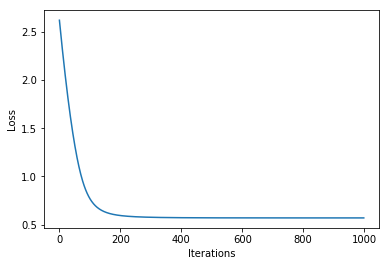

In [147]:
W_log, b_log = gradient_descent_log(X_log_train, W_log,b_log, Y_log_train)

Finally, we can test our trained algorithms on the test set:
For the logistic regression algorithm, we can measure its performance with accuracy, for linear regression we use MSE.

In [148]:
def accuracy(Y,Y_pred):
    return np.mean(np.abs(np.round(Y_pred)-Y))

In [149]:
accuracy(Y_log_test, forward_log(X_log_test,W_log,b_log))

0.5140756195298679

In [150]:
MSE_loss(Y_lin_test, forward_lin(X_lin_test,W_lin,b_lin))

0.5540161293261281